In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import time, copy

# device config (train our model on GPU if it is available which is much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# These transforms will be performed on every datapoint - in this example we want to transform every
# datapoint to a Tensor datatype, and perform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
mnist_train = torchvision.datasets.MNIST('', train=True, transform =transform, download=True)
# We will split out train dataset into train and validation!
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [50000, 10000])
mnist_test = torchvision.datasets.MNIST('', train=False, transform = transform, download=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 120MB/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 41.6MB/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 72.7MB/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.27MB/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
# We will create DataLoaders just like before with a batch size of 100
batch_size = 100
dataloaders = {'train': DataLoader(mnist_train, batch_size=batch_size),
               'val': DataLoader(mnist_val, batch_size=batch_size),
               'test': DataLoader(mnist_test, batch_size=batch_size)}

dataset_sizes = {'train': len(mnist_train),
                 'val': len(mnist_val),
                 'test': len(mnist_test)}
print(f'dataset_sizes = {dataset_sizes}')

dataset_sizes = {'train': 50000, 'val': 10000, 'test': 10000}


In [ ]:
# Hint! In the Module 3 Introduction to Pytorch notebook, the Network
# we created required the input data to be of shape Nx1 where N is the number of
# features. Currently, our MNIST dataset is shape 28x28 as they are images. Use
# this code snippet as you iterate through the datapoint in your dataset to flatten
# them so it is size 784x1 and can be used with the models we designed previously!

# This loop only iterates through the "train" datapoints
# In the previous notebook
phases = ["train", "val", "test"]
for phase in phases:
  for inputs, labels in dataloaders[phase]:
    # This flattens every every batch to the correct size!
    inputs = inputs.view(inputs.shape[0],-1)

In [ ]:
len(inputs)

100

In [ ]:
inputs

tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])

In [ ]:
labels

tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6])

In [ ]:
len(labels)

100

In [ ]:
print(len(inputs[0]))

784


In [ ]:
type(mnist_val);
subset = torch.utils.data.Subset(mnist_val, range(3))
element = subset[0]
print(len([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000]))
print(len(element[0]), len(element[0][0]), len(element[0][0][0]))
print(element[1])
#print( len(element), len(element[0]), len(element[1]))

28
1 28 28
2


In [ ]:
# model architecture
numerical_feature_columns = len(inputs[0])
input_size = numerical_feature_columns
#input_size = l # Make sure to remove the index column
hidden_size1 = 64
hidden_size2 = 64
hidden_size3 = 64
num_classes = 10

# external training parameters
# batch_size = 10
learning_rate = 0.001
num_epochs = 50

In [ ]:
# Simple two-hidden-layer classification model
class SimpleClassifier2Layer(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(SimpleClassifier2Layer, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, num_classes),
        )

    def forward(self, x):
        return self.layers(x)

# Simple three-hidden-layer classification model
class SimpleClassifier3Layer(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(SimpleClassifier3Layer, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, num_classes),
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
def plot_training_curves(training_curves,
                         phases=['train', 'val', 'test'],
                         metrics=['loss','acc']):
    epochs = list(range(len(training_curves['train_loss'])))
    for metric in metrics:
        plt.figure()
        plt.title(f'Training curves - {metric}')
        for phase in phases:
            key = phase+'_'+metric
            if key in training_curves:
                plt.plot(epochs, training_curves[phase+'_'+metric])
        plt.xlabel('epoch')
        plt.legend(labels=phases)

def classify_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_labels = torch.tensor([]).to(device)
    all_scores = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = torch.softmax(model(inputs),dim=1)
        _, preds = torch.max(outputs, 1)
        scores = outputs[:,1]
        all_labels = torch.cat((all_labels, labels), 0)
        all_scores = torch.cat((all_scores, scores), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_labels.detach().cpu(), all_scores.detach().cpu()

def plot_regression(model, device, dataloader):
    preds, targets = regress_predictions(model, device, dataloader)
    plt.figure()
    plt.title(f'Regression results')
    plt.scatter(targets, preds)
    xmin = min(min(targets), min(preds))
    xmax = max(max(targets), max(targets))
    plt.plot([xmin, xmax], [xmin, xmax], 'black', linestyle='--', marker='')
    plt.xlabel('target value')
    plt.ylabel('prediced value')

def regress_predictions(model, device, dataloader):
    model.eval()   # Set model to evaluate mode
    all_targets = torch.tensor([]).to(device)
    all_preds = torch.tensor([]).to(device)
    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        preds = model(inputs)
        all_targets = torch.cat((all_targets, targets), 0)
        all_preds = torch.cat((all_preds, preds), 0)
    return all_preds.detach().cpu(), all_targets.detach().cpu()

def plot_metrics(model, device, dataloaders, phase='test'):
    preds, labels, scores = classify_predictions(model, device, dataloaders[phase])

    fpr, tpr, thresholds = metrics.roc_curve(labels, scores)
    auc = metrics.roc_auc_score(labels, preds)

    disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    ind = np.argmin(np.abs(thresholds - 0.5))
    ax = disp.plot().ax_
    ax.scatter(fpr[ind], tpr[ind], color = 'red')
    ax.set_title('ROC Curve (red dot at threshold = 0.5)')

    cm = metrics.confusion_matrix(labels, preds)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    #disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- counts')

    ncm = metrics.confusion_matrix(labels, preds, normalize='true')
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=ncm)
    ax = disp.plot().ax_
    ax.set_title('Confusion Matrix -- rates')

    TN, FP, FN, TP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    N, P = TN + FP, TP + FN
    ACC = (TP + TN)/(P+N)
    TPR, FPR, FNR, TNR = TP/P, FP/N, FN/P, TN/N
    print(f'\nAt default threshold:')
    print(f' TN = {TN:5},  FP = {FP:5} -> N = {N:5}')
    print(f' FN = {FN:5},  TP = {TP:5} -> P = {P:5}')
    print(f'TNR = {TNR:5.3f}, FPR = {FPR:5.3f}')
    print(f'FNR = {FNR:5.3f}, TPR = {TPR:5.3f}')
    print(f'ACC = {ACC:6.3f}')

    return cm, fpr, tpr, thresholds, auc

In [ ]:
two_layer_model = SimpleClassifier2Layer(input_size, hidden_size1, hidden_size2, num_classes).to(device)
print(two_layer_model)

three_layer_model = SimpleClassifier3Layer(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)
print(three_layer_model)

SimpleClassifier2Layer(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)
SimpleClassifier3Layer(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [ ]:
# From https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

def train_model(model, dataloaders, dataset_sizes, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) # keep the best weights stored separately
    best_acc = 0.0
    best_epoch = 0

    # Each epoch has a training, validation, and test phase
    phases = ['train', 'val', 'test']

    # Keep track of how loss and accuracy evolves during training
    training_curves = {}
    for phase in phases:
        training_curves[phase+'_loss'] = []
        training_curves[phase+'_acc'] = []

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in phases:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                # This ensures all of our datapoints are flattened
                # before feeding them to our model
                inputs = inputs.view(inputs.shape[0],-1)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, predictions = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + update weights only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(predictions == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            training_curves[phase+'_loss'].append(epoch_loss)
            training_curves[phase+'_acc'].append(epoch_acc)

            print(f'{phase:5} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model if it's the best accuracy (based on validation)
            if phase == 'val' and epoch_acc > best_acc:
                best_epoch = epoch
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f} at epoch {best_epoch}')

    # load best model weights
    model.load_state_dict(best_model_wts)

    return model, training_curves

In [ ]:
# Two-hidden-Layer Training
# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(two_layer_model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
two_layer_model, training_curves_two_layer = train_model(two_layer_model, dataloaders, dataset_sizes,
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/50
----------
train Loss: 0.0436 Acc: 0.9848
val   Loss: 0.1560 Acc: 0.9625
test  Loss: 0.1461 Acc: 0.9653

Epoch 2/50
----------
train Loss: 0.0343 Acc: 0.9874
val   Loss: 0.1456 Acc: 0.9660
test  Loss: 0.1351 Acc: 0.9654

Epoch 3/50
----------
train Loss: 0.0338 Acc: 0.9877
val   Loss: 0.1590 Acc: 0.9624
test  Loss: 0.1412 Acc: 0.9646

Epoch 4/50
----------
train Loss: 0.0283 Acc: 0.9902
val   Loss: 0.1554 Acc: 0.9640
test  Loss: 0.1441 Acc: 0.9658

Epoch 5/50
----------
train Loss: 0.0270 Acc: 0.9909
val   Loss: 0.1410 Acc: 0.9680
test  Loss: 0.1288 Acc: 0.9695

Epoch 6/50
----------
train Loss: 0.0227 Acc: 0.9922
val   Loss: 0.1532 Acc: 0.9666
test  Loss: 0.1371 Acc: 0.9682

Epoch 7/50
----------
train Loss: 0.0218 Acc: 0.9927
val   Loss: 0.1493 Acc: 0.9668
test  Loss: 0.1390 Acc: 0.9669

Epoch 8/50
----------
train Loss: 0.0185 Acc: 0.9941
val   Loss: 0.1580 Acc: 0.9661
test  Loss: 0.1426 Acc: 0.9681

Epoch 9/50
----------
train Loss: 0.0172 Acc: 0.9943
val   Loss: 0.1478

In [ ]:
# Three-hidden-Layer Training
# loss and optimizer
criterion = nn.CrossEntropyLoss() # CrossEntropyLoss for classification!
optimizer = torch.optim.Adam(three_layer_model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

# Train the model. We also will store the results of training to visualize
three_layer_model, training_curves_three_layer = train_model(three_layer_model, dataloaders, dataset_sizes,
                                     criterion, optimizer, scheduler, num_epochs=num_epochs)


Epoch 1/50
----------
train Loss: 0.5620 Acc: 0.8225
val   Loss: 0.3141 Acc: 0.9068
test  Loss: 0.2932 Acc: 0.9119

Epoch 2/50
----------
train Loss: 0.2590 Acc: 0.9214
val   Loss: 0.2264 Acc: 0.9335
test  Loss: 0.2068 Acc: 0.9360

Epoch 3/50
----------
train Loss: 0.2038 Acc: 0.9381
val   Loss: 0.1941 Acc: 0.9426
test  Loss: 0.1753 Acc: 0.9473

Epoch 4/50
----------
train Loss: 0.1712 Acc: 0.9474
val   Loss: 0.1709 Acc: 0.9472
test  Loss: 0.1549 Acc: 0.9522

Epoch 5/50
----------
train Loss: 0.1462 Acc: 0.9552
val   Loss: 0.1556 Acc: 0.9518
test  Loss: 0.1428 Acc: 0.9554

Epoch 6/50
----------
train Loss: 0.1285 Acc: 0.9604
val   Loss: 0.1446 Acc: 0.9564
test  Loss: 0.1356 Acc: 0.9559

Epoch 7/50
----------
train Loss: 0.1152 Acc: 0.9642
val   Loss: 0.1405 Acc: 0.9571
test  Loss: 0.1351 Acc: 0.9559

Epoch 8/50
----------
train Loss: 0.1040 Acc: 0.9682
val   Loss: 0.1420 Acc: 0.9562
test  Loss: 0.1381 Acc: 0.9558

Epoch 9/50
----------
train Loss: 0.0944 Acc: 0.9708
val   Loss: 0.1399

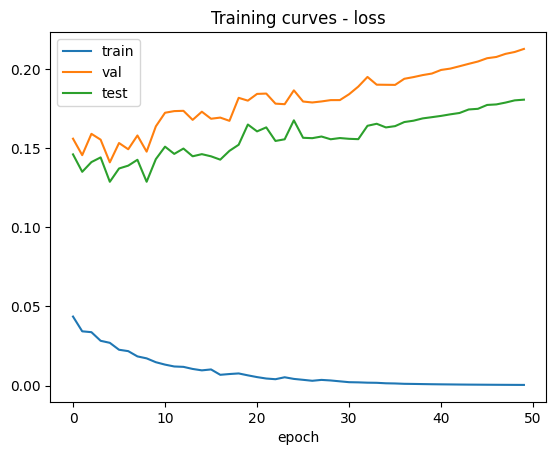

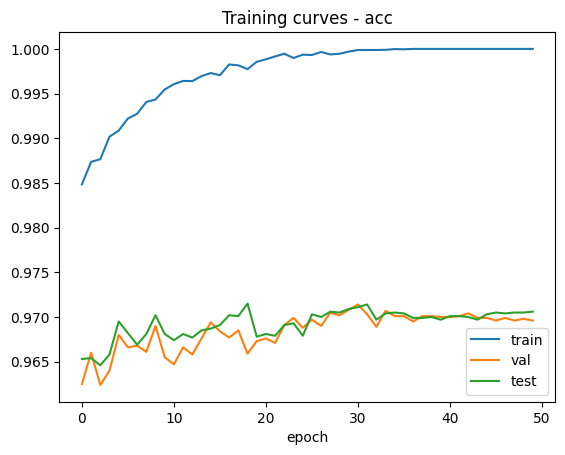

In [ ]:
# Training complete in 15m 9s
# Bast val Acc: 0.9714 from two_layer, so plot two_layer
import matplotlib.pyplot as plt

plot_training_curves(training_curves_two_layer, phases=['train', 'val', 'test'])

In [ ]:
# Looking at this graph, we can see that our model is currently overfitting to the training dataset. As our blue training loss curve is steadily decreasing, we actually see that the validation loss increases.

Looking at this graph, we can see that our model is currently overfitting to the training dataset. As our blue training loss curve is steadily decreasing, we actually see that the validation/test loss increases.

In [ ]:
res = plot_metrics(two_layer_model, device, dataloaders, phase='test')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x64)

looks like our model is incorrectly predicting images at a higher rate then vice-versa. # TODO : dive more into this